# load functions

In [1]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
#load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')
head(df_all)

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-1.7361927,-1.77777696,-1.52337076,-0.04158431,...,-0.4414281,0.30541555,0.14036813,1.02171324,0.02919136,0.002929355,notSig,up,notSig,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,-4.4542278,-5.89842646,-5.22659361,-1.44419866,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610009L18Rik,11,120239504,120242016,2513,+,ensembl_havana,-5.7348513,-5.04982074,-5.32317910,0.68503055,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.5443124,-0.18299550,-0.57995446,0.36131693,...,0.3259794,0.64123254,0.45306626,-0.78689319,0.41800085,0.183428443,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-1.0822802,-1.73978964,-1.85796767,-0.65750941,...,-1.4347083,0.05167993,0.01144092,1.51410985,0.07704533,0.012849451,notSig,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,0.1094487,0.09824498,0.09778162,-0.01120375,...,-0.5530121,0.13823240,0.04346982,0.01520704,0.98121037,0.964044006,notSig,notSig,notSig,protein_coding


# common parameters

In [2]:
f_display_sym <- FALSE
seed_geom_text_repel <- 40

#biotype_exclude <- NULL
biotype_exclude <- "pseudogene"  # current chice of fig2
#biotype_exclude <- "protein_coding|pseudogene"

#biotype_include <- NULL
biotype_include <- "protein_coding"  # current choice of fig2

# rsem with --outFilterMultimapNmax 20
fname_appendix <- ""

# htseq
#fname_appendix <- "_htseq"

if (!is.null(biotype_include)) {
    fname_appendix <- sprintf("%s_%s", fname_appendix, gsub("\\|", "_", biotype_include))
} 
if (!is.null(biotype_exclude)) {
    fname_appendix <- sprintf("%s_wo_%s", fname_appendix, gsub("\\|", "_", biotype_exclude))
} 

fname_appendix



[1] "_protein_coding_wo_pseudogene"

# common variables

In [3]:
if (!is.null(biotype_exclude)) {
    f <- grepl(biotype_exclude, df_all$biotype)
    df_exclude <- df_all[f, ]
    show(head(df_exclude))
    show(dim(df_exclude))
    excludes <- rownames(df_exclude)
    
    sym_ribo_up_cx_dn <- setdiff(sym_ribo_up_cx_dn, excludes)
    sym_ribo_dn_cx_up <- setdiff(sym_ribo_dn_cx_up, excludes)
    sym_ribo_up_cx_up <- setdiff(sym_ribo_up_cx_up, excludes)
    sym_ribo_dn_cx_dn <- setdiff(sym_ribo_dn_cx_dn, excludes)
    sym_ribo_cx_exclusively_affected <- setdiff(sym_ribo_cx_exclusively_affected, 
        excludes)
    sym_ribo_cx_exclusively_affected_up <- setdiff(sym_ribo_cx_exclusively_affected_up, 
        excludes)
    sym_ribo_cx_exclusively_affected_dn <- setdiff(sym_ribo_cx_exclusively_affected_dn, 
        excludes)    
}

              seqnames     start       end width strand         source
1810014B01Rik       10  86521389  86530670  9282      +         havana
2610005L07Rik        8  20016466  20055498 39033      +         havana
2700099C18Rik       17  95057528  95082560 25033      +         havana
2810025M15Rik        1 157239922 157247806  7885      + ensembl_havana
3000002C10Rik        9 109657011 109661774  4764      - ensembl_havana
3110053B16Rik       12  20924126  20971263 47138      -         havana
              unt.transcription tgfb.transcription tgfbCX5461.transcription
1810014B01Rik        -2.8286057         -4.4853001               -4.1425466
2610005L07Rik        -0.3642834         -0.3366501               -0.4971759
2700099C18Rik        -3.1993504         -4.2285648               -5.3041198
2810025M15Rik        -0.6030111         -0.7441168               -0.9447124
3000002C10Rik        -3.3429596         -4.1075866               -3.9474193
3110053B16Rik        -3.9591801         -3.9958

In [4]:
if (!is.null(biotype_include)) {
    f <- grepl(biotype_include, df_all$biotype)
    df_include <- df_all[f, ]
    show(head(df_include))
    show(dim(df_include))
    include_genes <- rownames(df_include)
    
    sym_ribo_up_cx_dn <- intersect(sym_ribo_up_cx_dn, include_genes)
    sym_ribo_dn_cx_up <- intersect(sym_ribo_dn_cx_up, include_genes)
    sym_ribo_up_cx_up <- intersect(sym_ribo_up_cx_up, include_genes)
    sym_ribo_dn_cx_dn <- intersect(sym_ribo_dn_cx_dn, include_genes)
    sym_ribo_cx_exclusively_affected <- intersect(sym_ribo_cx_exclusively_affected, 
        include_genes)
    sym_ribo_cx_exclusively_affected_up <- intersect(sym_ribo_cx_exclusively_affected_up, 
        include_genes)
    sym_ribo_cx_exclusively_affected_dn <- intersect(sym_ribo_cx_exclusively_affected_dn, 
        include_genes)    
}

              seqnames    start      end width strand         source
0610009B22Rik       11 51576213 51579701  3489      - ensembl_havana
0610010F05Rik       11 23514961 23583639 68679      - ensembl_havana
0610010K14Rik       11 70126032 70128740  2709      - ensembl_havana
0610012G03Rik       16 31765868 31767312  1445      -         havana
0610030E20Rik        6 72324300 72330131  5832      + ensembl_havana
0610040J01Rik        5 63969706 64056968 87263      + ensembl_havana
              unt.transcription tgfb.transcription tgfbCX5461.transcription
0610009B22Rik        -1.7361927        -1.77777696              -1.52337076
0610010F05Rik        -0.5443124        -0.18299550              -0.57995446
0610010K14Rik        -1.0822802        -1.73978964              -1.85796767
0610012G03Rik         0.1094487         0.09824498               0.09778162
0610030E20Rik        -0.7066802        -0.89024066              -0.91363548
0610040J01Rik        -1.1236084        -4.73941679           

# fig2

In [5]:
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_ribo_up_cx_dn: %d\n", length(sym_ribo_up_cx_dn))
f <- sym %in% sym_ribo_up_cx_dn
str_up_dn <- sprintf("Up-Down (n=%d)", length(sym_ribo_up_cx_dn))
df_fig[f, "fig.type"] <- str_up_dn

verb("sym_ribo_dn_cx_up: %d\n", length(sym_ribo_dn_cx_up))
f <- sym %in% sym_ribo_dn_cx_up
str_dn_up <- sprintf("Down-Up (n=%d)", length(sym_ribo_dn_cx_up))
df_fig[f, "fig.type"] <- str_dn_up

verb("sym_ribo_up_cx_up: %d\n", length(sym_ribo_up_cx_up))
f <- sym %in% sym_ribo_up_cx_up
str_up_up <- sprintf("Up-Up (n=%d)", length(sym_ribo_up_cx_up))
df_fig[f, "fig.type"] <- str_up_up

verb("sym_ribo_dn_cx_dn: %d\n", length(sym_ribo_dn_cx_dn))
f <- sym %in% sym_ribo_dn_cx_dn
str_dn_dn <- sprintf("Down-Down (n=%d)", length(sym_ribo_dn_cx_dn))
df_fig[f, "fig.type"] <- str_dn_dn

verb("sym_ribo_cx_exclusively_affected: %d\n", length(sym_ribo_cx_exclusively_affected))
f <- sym %in% sym_ribo_cx_exclusively_affected
# str_cx <- sprintf('Exclusively CX-affected (n=%d)',
# length(sym_ribo_cx_exclusively_affected))
str_cx <- sprintf("Excl. CX-affected (n=%d)", length(sym_ribo_cx_exclusively_affected))
df_fig[f, "fig.type"] <- str_cx
# verb('sym_ribo_cx_unaffected: %d\n',length(sym_ribo_cx_unaffected)); f <- sym
# %in% sym_ribo_cx_unaffected; df_fig[f, 'fig.type'] <- 'CX-unaffected'

#f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCunt48VStgfb48.translation) & !is.na(df_fig$log2FCtgfbVStgfbCX5461100nm.translation)
#df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_up_dn, str_dn_up, str_up_up, 
    str_dn_dn, str_cx))
# reorder
df_fig$order <- factor(df_fig$fig.type, level = c(str_cx, str_up_up, str_dn_dn, str_up_dn, 
    str_dn_up))
df_fig <- df_fig[order(df_fig$order), ]

nv_color <- c(`Up-Down` = "#ed7470", `Down-Up` = "#7aaa3d", `Up-Up` = "#e5af3c", 
    `Down-Down` = "#73c4fa", `Exclusively CX-affected` = "#aaaaaa")
names(nv_color) <- levels(df_fig$fig.type)

sym_ribo_up_cx_dn: 301
sym_ribo_dn_cx_up: 262
sym_ribo_up_cx_up: 65
sym_ribo_dn_cx_dn: 41
sym_ribo_cx_exclusively_affected: 519


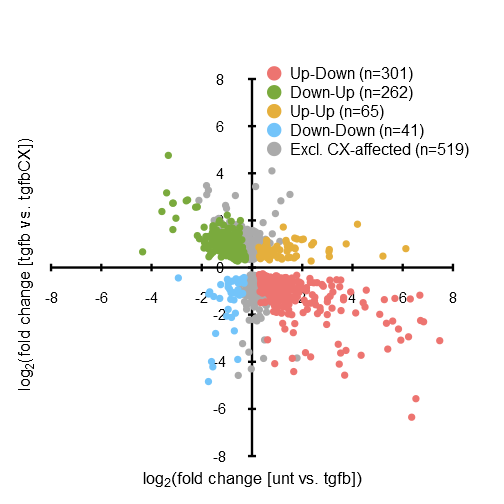

In [6]:
#nticks=13; xmax=12; ymax=12; gap_tick_label=5
nticks=9; xmax =8; ymax=8; gap_tick_label=8

f2 <- !is.na(df_fig$fig.type)
df_fig2 <- df_fig[f2,]
gg <- ggplot(data=df_fig2,
    aes(x=log2FCuntVStgfb.translation, 
        y=log2FCtgfbVStgfbCX5461.translation, colour=fig.type)) + 
    theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                   xlab=expression('log'[2]*'(fold change [unt vs. tgfb])'),
                   ylab=expression('log'[2]*'(fold change [tgfb vs. tgfbCX])'),
                   labsize=3.5, labgap=1, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
    geom_point(alpha=1, size=1) +
    theme(legend.title=element_blank(), 
          legend.text=element_text(size=9),
          legend.background = element_rect(color = NA),
          legend.key = element_rect(fill = "white", color = NA),
          legend.key.size = unit(0.4, "cm"),
          legend.key.width = unit(0,"cm"),
          #legend.spacing.y = unit(0.5, "cm"),          
          legend.position = c(0.53, 0.95), legend.justification = c(0, 1) ) +
    guides(colour = guide_legend(override.aes = list(size=3))) +
    ggtitle("") +
    scale_colour_manual(values = nv_color)

if (f_display_sym) {
    
  df_fig2$sig <- 'no'; 
  df_fig2$sym <- rownames(df_fig2)  
  f_sym <- grepl('n-R5s|Snora73a', df_fig2$sym)
    
  th_log2fc <- log2(4)
  f_up_dn <- !is.na(df_fig2$fig.type) & df_fig2$log2FCuntVStgfb.translation > th_log2fc & df_fig2$log2FCtgfbVStgfbCX5461.translation < -th_log2fc
  f_dn_up <- !is.na(df_fig2$fig.type) & df_fig2$log2FCuntVStgfb.translation < -th_log2fc & df_fig2$log2FCtgfbVStgfbCX5461.translation > th_log2fc
  df_fig2$sig[f_up_dn & f_sym] <- 'up_dn';
  df_fig2$sig[f_dn_up & f_sym] <- 'dn_up';
  f <- grepl("Gm|Rik", df_fig2$sym)
  df_fig2$sig[f] <- 'no'

  require('ggrepel')
  df_fig2$nudge_x <- 0.2
  df_fig2$nudge_x[f_dn_up] <- -0.2 
  df_fig2$nudge_y <- -0.2
  f <- grepl("n-R5s", df_fig2$sym)
  df_fig2[f, 'nudge_x'] <- 0.2  
  df_fig2[f, 'nudge_y'] <- 0.2

  # change name
  df_fig2$sym <- mgsub::mgsub(df_fig2$sym,
        tolower(c('HALLMARK','_')), c('',' '))
  #df_fig2$sym <- str_wrap(df_fig2$sym, width=15)

  f <- df_fig2$sig != 'no'
  if (any(f)) {
  df1 <- df_fig2[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=sym, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
  }
             
}


print_figure(gg, width=4.2, height=4.2,
            file=sprintf("scatter_plot.fig2%s", fname_appendix))

# GO enrichment

## cx_exclusively_affected_up

In [7]:
condstr <- "cx_exclusively_affected_up"

In [8]:
verb("sym_ribo_cx_exclusively_affected_up: %d\n", length(sym_ribo_cx_exclusively_affected_up))


sym_ribo_cx_exclusively_affected_up: 331


In [9]:
library(clusterProfiler)
library(DOSE)

entrez.id <- unique(entrezdf$entrez_id[ match(sym_ribo_cx_exclusively_affected_up, entrezdf$gene_name) ])

set.seed(40)
egmt_cx_exclusive_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
                minGSSize = 10, maxGSSize = 500)
egmt_cx_exclusive_up <- setReadable(egmt_cx_exclusive_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(egmt_cx_exclusive_up)
dim(egmt_cx_exclusive_up)

write.table(egmt_cx_exclusive_up, file = sprintf('table/fig2.%s.go.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

Warning message:
"package 'DOSE' was built under R version 4.1.2"
DOSE v3.20.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': object 'entrezdf' not found


### dotplot

In [ ]:
n_top_egmt <- 10
gg <- dotplot(egmt_cx_exclusive_up, x = "GeneRatio",
        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
        title = "Excl. CX-affected Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top%d", condstr, n_top_egmt))


## cx_exclusively_affected_dn

In [ ]:
condstr <- "cx_exclusively_affected_dn"

In [ ]:
verb("sym_ribo_cx_exclusively_affected_dn: %d\n", length(sym_ribo_cx_exclusively_affected_dn))


In [ ]:
library(clusterProfiler)
library(DOSE)
library(org.Mm.eg.db)

#entrez.id <- unique(entrezdf$entrez_id[ match(sym_ribo_cx_exclusively_affected_dn, entrezdf$gene_name) ])
## Modified by Nitish
entrez.id <- bitr(sym_ribo_cx_exclusively_affected_dn, fromType = "SYMBOL",
                  toType = c("ENSEMBL", "ENTREZID"),
                  OrgDb = org.Mm.eg.db)
#(sym_ribo_cx_exclusively_affected_dn)
entrez.id <- entrez.id$ENTREZID
set.seed(40)
egmt_cx_exclusive_dn <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
                minGSSize = 10, maxGSSize = 500)
egmt_cx_exclusive_dn <- setReadable(egmt_cx_exclusive_dn, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(egmt_cx_exclusive_dn)
dim(egmt_cx_exclusive_dn)

write.table(egmt_cx_exclusive_dn, file = sprintf('table/fig2.%s.go.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

## dotplot

In [ ]:
n_top_egmt <- 10
gg <- dotplot(egmt_cx_exclusive_dn, x = "GeneRatio",
        color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
        title = "Excl. CX-affected Down") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
    file=sprintf("dotplot.%s.enricher.go_top%d", condstr, n_top_egmt))

In [ ]:
help(dotplot)